install opencv python library

In [53]:
!pip install opencv-python
!pip install --upgrade opencv-python


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
import cv2
print(cv2.__version__)


4.7.0


Connect with drive to use dataset folder


In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing necessary libraries

In [56]:
#importing libaries
import numpy as np 
import pandas as pd
import random as rd
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.metrics import accuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers

#setting seed for reproducability
from numpy.random import seed
seed(25)
tf.random.set_seed(50)

##Loading dataset

In [57]:
# 0 - Normal
# 1 - MS lesions 

data = [] #creating a list for images
paths = [] #creating a list for paths
labels = [] #creating a list to put our 0 or 1 labels

#staring with the images that have MS lesions 
for r, d, f in os.walk(r'/content/drive/MyDrive/project notes/Dataset_Diagnose_MS/Yes_MS_lesions'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        labels.append(1)

#now working with the images with no MS lesions    
paths = []
for r, d, f in os.walk(r'/content/drive/MyDrive/project notes/Dataset_Diagnose_MS/No_MS_lesions'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        labels.append(0)
        
data = np.array(data)
data.shape

labels = np.array(labels)
labels = labels.reshape(305,1)

print('data shape is:', data.shape)
print('labels shape is:', labels.shape)

data shape is: (305, 128, 128, 3)
labels shape is: (305, 1)


# Data Preprocessing

In [58]:
print(data.shape)

(305, 128, 128, 3)


In [59]:
##just for testing
## to show if values store correct or not
print("data list", data)
print("_____________________________")
print("paths",paths)
print("_____________________________")
print("labels",labels)


data list [[[[  1   1   1]
   [  1   1   1]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  1   1   1]
   [  1   1   1]
   [  2   2   2]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  1   1   1]
   [  1   1   1]
   [  1   1   1]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  ...

  [[  2   2   2]
   [  2   2   2]
   [  2   2   2]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  [[  2   2   2]
   [  2   2   2]
   [  2   2   2]
   ...
   [  0   0   0]
   [  1   1   1]
   [  1   1   1]]

  [[  0   0   0]
   [  0   0   0]
   [  1   1   1]
   ...
   [  0   0   0]
   [  1   1   1]
   [  1   1   1]]]


 [[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
 

In [60]:
#getting the max of the array
print(np.max(data))
#getting the min of the array
print(np.min(data))


255
0


In [61]:
#reducing the data to between 1 and 0
data = data / 255.00
#getting the max of the array
print(np.max(data))
#getting the min of the array
print(np.min(data))


1.0
0.0


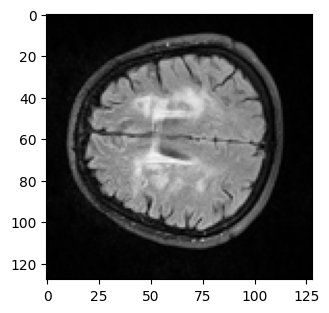

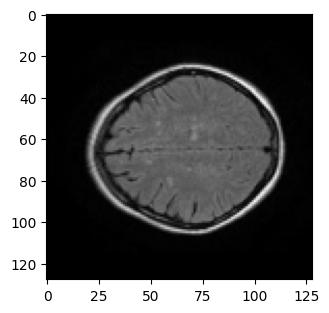

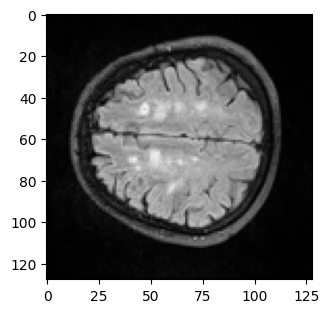

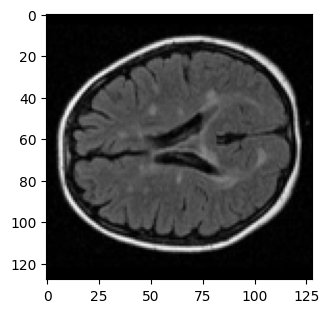

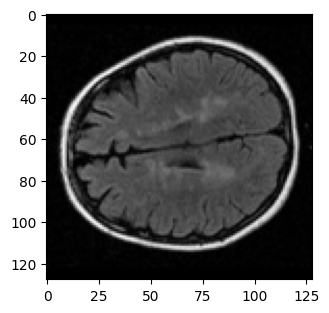

In [62]:
# show images 
for i in range(5):
    fig = plt.figure(figsize=(20,20))
    plt.subplot(5,5,i+1)
    image = plt.imshow(data[i])
    plt.show(image)

#Splitting data 


In [63]:
# 6
# Splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.15, shuffle=True, random_state=7)

# Splitting the train data into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, shuffle=True, random_state=7)

In [64]:
##
## testing 15%
## validation 15%
## training 70%

print("Shape of our training data:", x_train.shape)
print("Shape of our training labels:", y_train.shape)
print("Shape of our validation data:", x_val.shape)
print("Shape of our validation labels:", y_val.shape)
print("Shape of our test data:", x_test.shape)
print("Shape of our test labels:", y_test.shape)



Shape of our training data: (220, 128, 128, 3)
Shape of our training labels: (220, 1)
Shape of our validation data: (39, 128, 128, 3)
Shape of our validation labels: (39, 1)
Shape of our test data: (46, 128, 128, 3)
Shape of our test labels: (46, 1)


###Adding data agumentation 


In [65]:
# adding data augmentation 
## after importing library from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation parameters
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Fit the data augmentation parameters on the training data
train_datagen.fit(x_train)

# Create the augmented training data generator
train_generator = train_datagen.flow(
    x_train, y_train, batch_size=64, shuffle=True, seed=7)
# Create the validation data generator
val_datagen = ImageDataGenerator()
val_generator = val_datagen.flow(
    x_val, y_val, batch_size=64, shuffle=False)


#Create convolutional neural network (CNN) Model 



In [102]:
# cnn model 

model = keras.Sequential([
    
    layers.Conv2D(
        filters=32, 
        kernel_size=(5,5), 
        activation="relu", 
        padding='same', 
        input_shape=[128, 128, 3],
        kernel_regularizer=regularizers.l2(0.001) # add L2 regularization
    ),
    layers.MaxPool2D(),
    
    layers.Conv2D(
        filters=64, 
        kernel_size=(3,3), 
        activation="relu", 
        padding='same',
        kernel_regularizer=regularizers.l2(0.001) # add L2 regularization
    ),
    layers.MaxPool2D(),
    
    layers.Conv2D(
        filters=128, 
        kernel_size=(3,3), 
        activation="relu", 
        padding='same',
        kernel_regularizer=regularizers.l2(0.001) # add L2 regularization
    ),
    layers.MaxPool2D(),
    
    layers.Conv2D(
        filters=128, 
        kernel_size=(3,3), 
        activation="relu", 
        padding='same',
        kernel_regularizer=regularizers.l2(0.001) # add L2 regularization
    ),
    layers.MaxPool2D(),
    
    layers.Flatten(),
    layers.Dropout(0.8), 
    layers.Dense(units=256, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])




In [103]:
# to show information of CNN
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 16, 16, 128)     

In [104]:
# configure the model for training
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='hinge',
    metrics=['accuracy']
)

#including early stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.0001,
    restore_best_weights=True,
)


In [105]:
#training the model 
history = model.fit(
    train_generator,
    batch_size=32,
    epochs=200,
    validation_data=val_generator,
    callbacks=[early_stopping],
    verbose=2
)

Epoch 1/200
4/4 - 10s - loss: 0.9945 - accuracy: 0.3909 - val_loss: 0.9664 - val_accuracy: 0.5897 - 10s/epoch - 3s/step
Epoch 2/200
4/4 - 8s - loss: 0.9963 - accuracy: 0.3773 - val_loss: 0.9628 - val_accuracy: 0.7692 - 8s/epoch - 2s/step
Epoch 3/200
4/4 - 7s - loss: 0.9901 - accuracy: 0.4727 - val_loss: 0.9580 - val_accuracy: 0.7949 - 7s/epoch - 2s/step
Epoch 4/200
4/4 - 7s - loss: 0.9841 - accuracy: 0.6091 - val_loss: 0.9525 - val_accuracy: 0.7949 - 7s/epoch - 2s/step
Epoch 5/200
4/4 - 8s - loss: 0.9782 - accuracy: 0.7182 - val_loss: 0.9462 - val_accuracy: 0.7949 - 8s/epoch - 2s/step
Epoch 6/200
4/4 - 10s - loss: 0.9751 - accuracy: 0.7318 - val_loss: 0.9389 - val_accuracy: 0.7949 - 10s/epoch - 3s/step
Epoch 7/200
4/4 - 7s - loss: 0.9679 - accuracy: 0.7773 - val_loss: 0.9307 - val_accuracy: 0.7949 - 7s/epoch - 2s/step
Epoch 8/200
4/4 - 7s - loss: 0.9650 - accuracy: 0.7682 - val_loss: 0.9209 - val_accuracy: 0.7949 - 7s/epoch - 2s/step
Epoch 9/200
4/4 - 7s - loss: 0.9562 - accuracy: 0.76

#Result


In [106]:
# Print accuracy
print("Training accuracy:", history.history['accuracy'][-1])
print("Validation accuracy:", history.history['val_accuracy'][-1])

test_accuracy = history.history['val_accuracy'][-1]
print("Test accuracy:", test_accuracy)


Training accuracy: 0.7727272510528564
Validation accuracy: 0.7948718070983887
Test accuracy: 0.7948718070983887


#Testting
##Result of prediction 

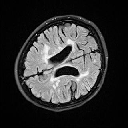

In [112]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

# load the image
#1
test_image = load_img('/content/drive/MyDrive/project notes/Dataset_Diagnose_MS/Yes_MS_lesions/10-image.0013 H .jpg', target_size = (128,128))
test_image

In [113]:
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
resulty = model.predict(test_image)

output = np.round(resulty).astype(int)
output

1/1 [==============================] - 0s 30ms/step


array([[1]])

#Download the model with extension tflite 
###To put it in flutter project, to integrate between model and flutter app

In [77]:

#tf-lite
#1
model.save('my_model.h5')

#2
!pip install tensorflow==2.7.0




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==2.7.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0)
ERROR: No matching distribution found for tensorflow==2.7.0


In [78]:
#3
import tensorflow as tf
import os

# SavedModel file in the current directory
print(os.getcwd())  # Print the current working directory

saved_model_path = './my_model.h5'  # Specify the correct file path

# Load the Keras model from the SavedModel file
model = tf.keras.models.load_model(saved_model_path)

# Convert the Keras model to a TensorFlow Lite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()


/content


In [79]:

#4
# Save the TensorFlow Lite model to a file and download it
with open('my_model.tflite', 'wb') as f:
  f.write(tflite_model)
  

In [80]:

#5
from google.colab import files

files.download('my_model.tflite')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [81]:
with open('my_file.txt', 'w') as f:
    f.write('1 MS lesions\n')
    f.write('0 normal images\n')

files.download('my_file.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>